<a href="https://colab.research.google.com/github/wloerakving/Memor-AI-zing/blob/main/CICERONEt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Install Packages and import libraries

In [ ]:
!pip install transformers graphviz torchviz --quiet
!pip install datasets --quiet
!pip install graphviz --quiet


In [ ]:
!pip install accelerate -U --quiet
!pip install transformers[torch] --quiet

In [ ]:
!pip install evaluate --quiet

In [ ]:
# install spacy
!python -m spacy download en_core_web_lg --quiet

2023-07-27 09:26:14.365849: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 587.7/587.7 MB 553.8 kB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_lg')


In [ ]:
# for data manipulation
import pandas as pd
pd.set_option('display.max_columns', None)

import numpy as np
import os
import random

# for text preprocessing
import spacy
from collections import Counter

# for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Load and Explore data

In [ ]:
# Mount drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Laod data
data = pd.read_excel('/content/drive/MyDrive/neuromatch/hcV3-stories.xlsx')
# Visualize the first 5 rows of the database
data.head()

,AssignmentId,WorkTimeInSeconds,WorkerId,annotatorAge,annotatorGender,annotatorRace,distracted,draining,frequency,importance,logTimeSinceEvent,mainEvent,memType,mostSurprising,openness,recAgnPairId,recImgPairId,similarity,similarityReason,story,stressful,summary,timeSinceEvent
0,32RIADZISTQWI5XIVG5BN0VMYFRS4U,1641,E9TY34YY,25.0,man,white,1.0,1.0,NaN,3.0,4499809670330260,attending a show,imagined,when I got concert tickets,0.00,NaN,3018Q3ZVOJCZJFDMPSFXATCQ4DARA2,3.0,"I've been to a couple concerts, but not many.","Concerts are my most favorite thing, and my bo...",1.0,My boyfriend and I went to a concert together ...,90.0
1,3018Q3ZVOJCZJFDMPSFXATCQ4DARA2,1245,237K2NI1,25.0,woman,white,1.0,1.0,3.0,4.0,4499809670330260,a concert.,recalled,we saw the beautiful sky.,1.00,NaN,3018Q3ZVOJCZJFDMPSFXATCQ4DARA2,NaN,NaN,"The day started perfectly, with a great drive ...",1.0,My boyfriend and I went to a concert together ...,90.0
2,3IRIK4HM3B6UQBC0HI8Q5TBJZLEC61,1159,FK5QTANB,35.0,woman,black,1.0,1.0,NaN,4.0,5010635294096250,my sister having her twins a little early,imagined,she went into labor early,0.50,NaN,3018Q3ZVOJCZJFDMPSFXATCQG04RAI,3.0,I am a mother myself,It seems just like yesterday but today makes f...,1.0,My sister gave birth to my twin niece and neph...,150.0
3,3018Q3ZVOJCZJFDMPSFXATCQG04RAI,500,UYOSBBRS,30.0,woman,white,1.0,4.0,3.0,5.0,5010635294096250,meeting my twin niece and nephew.,recalled,finding out they were healthy.,1.00,NaN,3018Q3ZVOJCZJFDMPSFXATCQG04RAI,NaN,NaN,"Five months ago, my niece and nephew were born...",2.0,My sister gave birth to my twin niece and neph...,150.0
4,3MTMREQS4W44RBU8OMP3XSK8NMJAWZ,1074,34BFLNJV,25.0,man,white,2.0,2.0,NaN,3.0,34011973816621500,the consequences of going to burning man,imagined,When I don't answer the phone in case I owe th...,0.25,NaN,3018Q3ZVOJCZJFDMPSFXATCQG06AR3,4.0,Because I also have money problems,About a month ago I went to burning man. I was...,4.0,It is always a journey for me to go to burning...,30.0


In [ ]:
data.shape

(6854, 23)

In [ ]:
data[['memType','recImgPairId','story','mainEvent','summary']]

,memType,recImgPairId,story,mainEvent,summary
0,imagined,3018Q3ZVOJCZJFDMPSFXATCQ4DARA2,"Concerts are my most favorite thing, and my bo...",attending a show,My boyfriend and I went to a concert together ...
1,recalled,3018Q3ZVOJCZJFDMPSFXATCQ4DARA2,"The day started perfectly, with a great drive ...",a concert.,My boyfriend and I went to a concert together ...
2,imagined,3018Q3ZVOJCZJFDMPSFXATCQG04RAI,It seems just like yesterday but today makes f...,my sister having her twins a little early,My sister gave birth to my twin niece and neph...
3,recalled,3018Q3ZVOJCZJFDMPSFXATCQG04RAI,"Five months ago, my niece and nephew were born...",meeting my twin niece and nephew.,My sister gave birth to my twin niece and neph...
4,imagined,3018Q3ZVOJCZJFDMPSFXATCQG06AR3,About a month ago I went to burning man. I was...,the consequences of going to burning man,It is always a journey for me to go to burning...
...,...,...,...,...,...
6849,recalled,NaN,My dog was diagnosed with lymphoma a year ago ...,losing and finding a pet.,"My dog, who had lymphoma, was suffering so I h..."
6850,recalled,NaN,"Over my vacation from my job, I went to Casper...",about a vacation event worked on,"On vacation, a side job was taken to plan an e..."
6851,recalled,NaN,This event was a birthday party for my nephew....,my nephew's birthday party,This was a birthday party for my nephew that h...
6852,recalled,NaN,This event occurred about two weeks ago. I was...,my cousin's birthday,It was my little cousin's birthday and went to...


<Axes: >

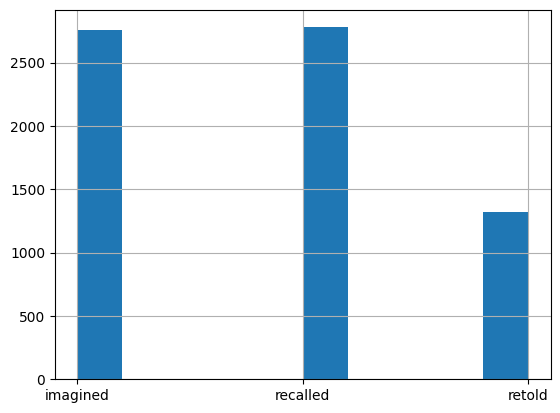

In [ ]:
data['memType'].hist()

In [ ]:
data.isna().sum()

AssignmentId            0
WorkTimeInSeconds       0
WorkerId                0
annotatorAge           23
annotatorGender         0
annotatorRace           0
distracted              0
draining                0
frequency            2756
importance            144
logTimeSinceEvent       0
mainEvent               0
memType                 1
mostSurprising          1
openness                3
recAgnPairId         4236
recImgPairId         1528
similarity           4100
similarityReason     4100
story                  11
stressful             343
summary               343
timeSinceEvent        355
dtype: int64

<Axes: >

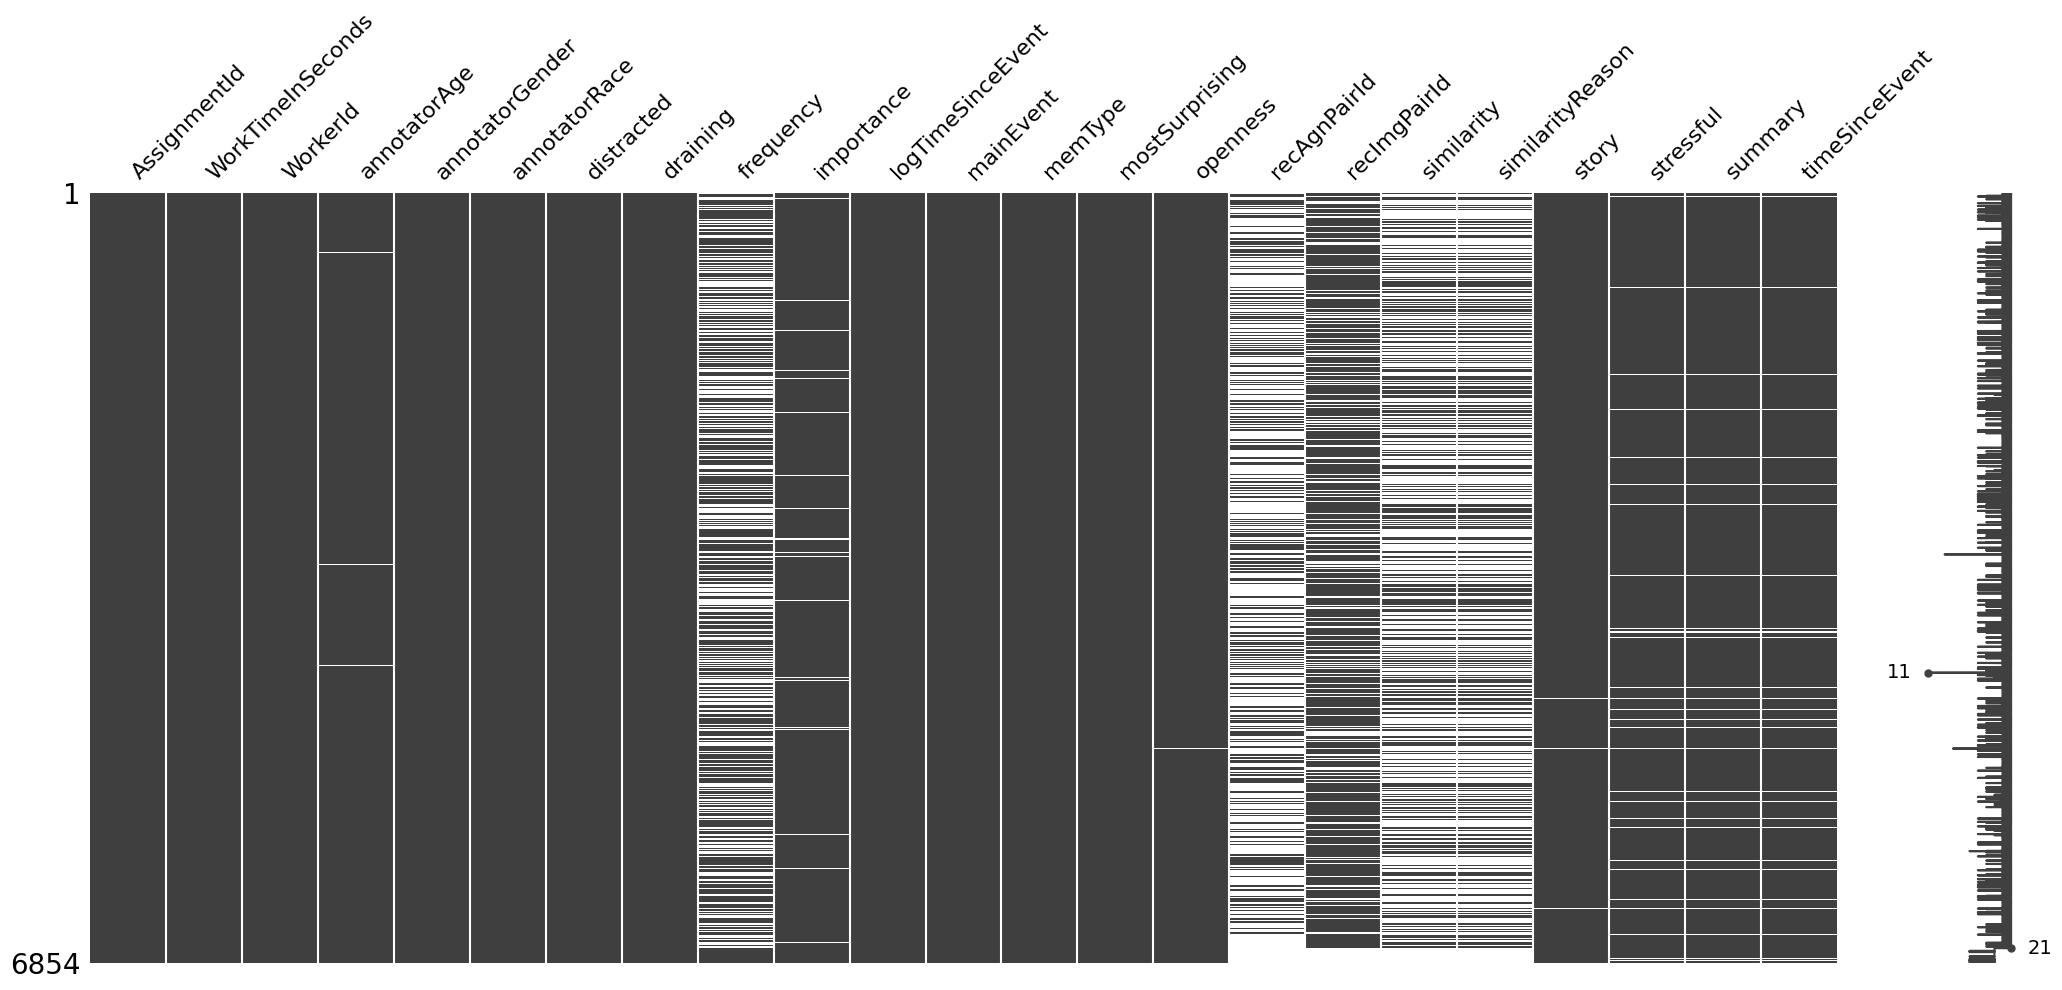

In [ ]:
import missingno as msno
msno.matrix(data)

# Alternatively, you can use a heatmap to visualize missing data
# sns.heatmap(data.isnull(), cbar=False)

In [ ]:
# story and memType contain missing values
data = data.dropna(subset=['story', 'memType'])

In [ ]:
data[['frequency','similarity']] = data[['frequency','similarity']].fillna(0)
data.head()

<ipython-input-60-feb5d3f1c678>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[['frequency','similarity']] = data[['frequency','similarity']].fillna(0)


,AssignmentId,WorkTimeInSeconds,WorkerId,annotatorAge,annotatorGender,annotatorRace,distracted,draining,frequency,importance,logTimeSinceEvent,mainEvent,memType,mostSurprising,openness,recAgnPairId,recImgPairId,similarity,similarityReason,story,stressful,summary,timeSinceEvent
0,32RIADZISTQWI5XIVG5BN0VMYFRS4U,1641,E9TY34YY,25.0,man,white,1.0,1.0,0.0,3.0,4499809670330260,attending a show,imagined,when I got concert tickets,0.00,NaN,3018Q3ZVOJCZJFDMPSFXATCQ4DARA2,3.0,"I've been to a couple concerts, but not many.","Concerts are my most favorite thing, and my bo...",1.0,My boyfriend and I went to a concert together ...,90.0
1,3018Q3ZVOJCZJFDMPSFXATCQ4DARA2,1245,237K2NI1,25.0,woman,white,1.0,1.0,3.0,4.0,4499809670330260,a concert.,recalled,we saw the beautiful sky.,1.00,NaN,3018Q3ZVOJCZJFDMPSFXATCQ4DARA2,0.0,NaN,"The day started perfectly, with a great drive ...",1.0,My boyfriend and I went to a concert together ...,90.0
2,3IRIK4HM3B6UQBC0HI8Q5TBJZLEC61,1159,FK5QTANB,35.0,woman,black,1.0,1.0,0.0,4.0,5010635294096250,my sister having her twins a little early,imagined,she went into labor early,0.50,NaN,3018Q3ZVOJCZJFDMPSFXATCQG04RAI,3.0,I am a mother myself,It seems just like yesterday but today makes f...,1.0,My sister gave birth to my twin niece and neph...,150.0
3,3018Q3ZVOJCZJFDMPSFXATCQG04RAI,500,UYOSBBRS,30.0,woman,white,1.0,4.0,3.0,5.0,5010635294096250,meeting my twin niece and nephew.,recalled,finding out they were healthy.,1.00,NaN,3018Q3ZVOJCZJFDMPSFXATCQG04RAI,0.0,NaN,"Five months ago, my niece and nephew were born...",2.0,My sister gave birth to my twin niece and neph...,150.0
4,3MTMREQS4W44RBU8OMP3XSK8NMJAWZ,1074,34BFLNJV,25.0,man,white,2.0,2.0,0.0,3.0,34011973816621500,the consequences of going to burning man,imagined,When I don't answer the phone in case I owe th...,0.25,NaN,3018Q3ZVOJCZJFDMPSFXATCQG06AR3,4.0,Because I also have money problems,About a month ago I went to burning man. I was...,4.0,It is always a journey for me to go to burning...,30.0


In [ ]:
data.isna().sum()

AssignmentId            0
WorkTimeInSeconds       0
WorkerId                0
annotatorAge           23
annotatorGender         0
annotatorRace           0
distracted              0
draining                0
frequency               0
importance            143
logTimeSinceEvent       0
mainEvent               0
memType                 0
mostSurprising          0
openness                0
recAgnPairId         4225
recImgPairId         1525
similarity              0
similarityReason     4097
story                   0
stressful             332
summary               332
timeSinceEvent        344
dtype: int64

In [ ]:
data.dtypes

AssignmentId          object
WorkTimeInSeconds      int64
WorkerId              object
annotatorAge         float64
annotatorGender       object
annotatorRace         object
distracted           float64
draining             float64
frequency            float64
importance           float64
logTimeSinceEvent      int64
mainEvent             object
memType               object
mostSurprising        object
openness             float64
recAgnPairId          object
recImgPairId          object
similarity           float64
similarityReason      object
story                 object
stressful            float64
summary               object
timeSinceEvent       float64
dtype: object

In [ ]:
data_encoded = pd.get_dummies(data, columns=['annotatorGender','annotatorRace','memType'])
data_encoded.head()

,AssignmentId,WorkTimeInSeconds,WorkerId,annotatorAge,distracted,draining,frequency,importance,logTimeSinceEvent,mainEvent,mostSurprising,openness,recAgnPairId,recImgPairId,similarity,similarityReason,story,stressful,summary,timeSinceEvent,annotatorGender_man,annotatorGender_na,annotatorGender_nonBinary,annotatorGender_other,annotatorGender_transman,annotatorGender_transwoman,annotatorGender_woman,annotatorRace_asian,annotatorRace_black,annotatorRace_hisp,annotatorRace_indian,annotatorRace_islander,annotatorRace_middleEastern,annotatorRace_na,annotatorRace_native,annotatorRace_other,annotatorRace_white,memType_imagined,memType_recalled,memType_retold
0,32RIADZISTQWI5XIVG5BN0VMYFRS4U,1641,E9TY34YY,25.0,1.0,1.0,0.0,3.0,4499809670330260,attending a show,when I got concert tickets,0.00,NaN,3018Q3ZVOJCZJFDMPSFXATCQ4DARA2,3.0,"I've been to a couple concerts, but not many.","Concerts are my most favorite thing, and my bo...",1.0,My boyfriend and I went to a concert together ...,90.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0
1,3018Q3ZVOJCZJFDMPSFXATCQ4DARA2,1245,237K2NI1,25.0,1.0,1.0,3.0,4.0,4499809670330260,a concert.,we saw the beautiful sky.,1.00,NaN,3018Q3ZVOJCZJFDMPSFXATCQ4DARA2,0.0,NaN,"The day started perfectly, with a great drive ...",1.0,My boyfriend and I went to a concert together ...,90.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0
2,3IRIK4HM3B6UQBC0HI8Q5TBJZLEC61,1159,FK5QTANB,35.0,1.0,1.0,0.0,4.0,5010635294096250,my sister having her twins a little early,she went into labor early,0.50,NaN,3018Q3ZVOJCZJFDMPSFXATCQG04RAI,3.0,I am a mother myself,It seems just like yesterday but today makes f...,1.0,My sister gave birth to my twin niece and neph...,150.0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0
3,3018Q3ZVOJCZJFDMPSFXATCQG04RAI,500,UYOSBBRS,30.0,1.0,4.0,3.0,5.0,5010635294096250,meeting my twin niece and nephew.,finding out they were healthy.,1.00,NaN,3018Q3ZVOJCZJFDMPSFXATCQG04RAI,0.0,NaN,"Five months ago, my niece and nephew were born...",2.0,My sister gave birth to my twin niece and neph...,150.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0
4,3MTMREQS4W44RBU8OMP3XSK8NMJAWZ,1074,34BFLNJV,25.0,2.0,2.0,0.0,3.0,34011973816621500,the consequences of going to burning man,When I don't answer the phone in case I owe th...,0.25,NaN,3018Q3ZVOJCZJFDMPSFXATCQG06AR3,4.0,Because I also have money problems,About a month ago I went to burning man. I was...,4.0,It is always a journey for me to go to burning...,30.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0


array([[<Axes: title={'center': 'WorkTimeInSeconds'}>,
        <Axes: title={'center': 'annotatorAge'}>,
        <Axes: title={'center': 'distracted'}>],
       [<Axes: title={'center': 'draining'}>,
        <Axes: title={'center': 'frequency'}>,
        <Axes: title={'center': 'importance'}>],
       [<Axes: title={'center': 'logTimeSinceEvent'}>,
        <Axes: title={'center': 'openness'}>,
        <Axes: title={'center': 'similarity'}>],
       [<Axes: title={'center': 'stressful'}>,
        <Axes: title={'center': 'timeSinceEvent'}>, <Axes: >]],
      dtype=object)

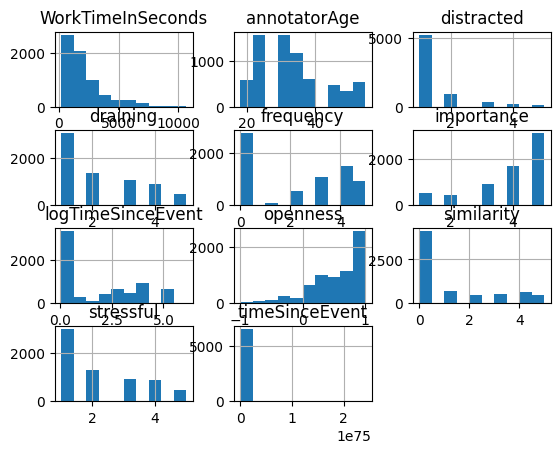

In [ ]:
data.hist()

In [ ]:
data['memType'].value_counts()

recalled    2779
imagined    2746
retold      1318
Name: memType, dtype: int64

<ipython-input-66-ae638dbfe5b6>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = data_encoded.corr() # compute the correlation matrix


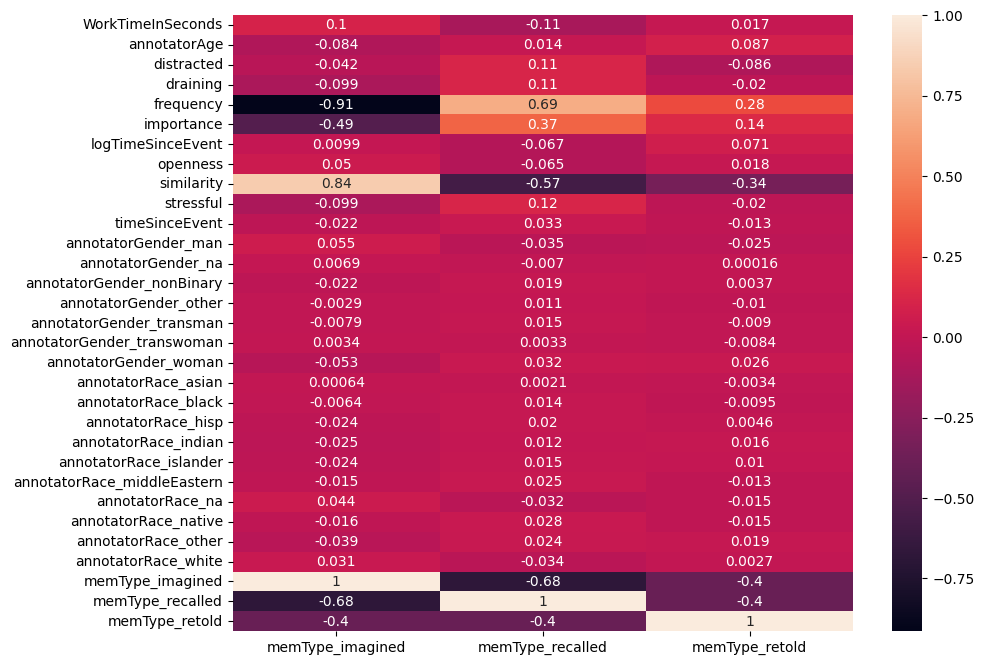

In [ ]:
corr = data_encoded.corr() # compute the correlation matrix

plt.figure(figsize=(10, 8))
sns.heatmap(corr[['memType_imagined','memType_recalled','memType_retold']], annot=True) # visualize the correlation matrix
plt.show()

# Text Preprocessing

In [ ]:
from spacy.lang.en.stop_words import STOP_WORDS
import string

# Load Spacy's English language model
nlp = spacy.load("en_core_web_lg")

In [ ]:
docs = []

for doc in nlp.pipe(data['story'], n_process=os.cpu_count()-1, batch_size=500, disable = ["transformer", "ner", "textcat"]):
    docs.append(doc)

**Preprocessing steps:**

Compute the following  preprocessing steps:

- lower case
- tokenization
- remove punctuation
- remove stop words
- lemmatization


In [ ]:
# Define a function to lemmatize content words
def preprocessed_text(doc):
    # Remove punctuation, double space, stop words and lemmatize text:
    clean_tokens = [token.lemma_.lower() for token in doc if not (token.is_punct or token.is_space or token.is_stop)]
    # Join the cleaned tokens back into a string
    clean_text = " ".join(clean_tokens)
    return clean_tokens, clean_text

In [ ]:
# Apply the preprocessing pipeline using nlp.pipe
clean_tokens = []
clean_text = []

for doc in docs:
    tokens, text = preprocessed_text(doc)
    clean_tokens.append(tokens)
    clean_text.append(text)

In [ ]:
# Add the preprocessed text as a new column in the dataframe
data['story_preprocessed'] = clean_text
data['story_tokens'] = clean_tokens

In [ ]:
# Define unique words
unique_words = set()

# Iterate over the clean tokens
for tokens in clean_tokens:
    # Iterate over each token in the tokens array
    for token in tokens:
        # Add each token to the set of unique words
        unique_words.add(token)

# Convert the set of unique words to a dictionary for easier access
unique_words_dict = {word: index for index, word in enumerate(unique_words)}

# Print the unique words and their corresponding indices
for word, index in unique_words_dict.items():
    print(f'Word: {word}, Index: {index}')


Streaming output truncated to the last 5000 lines.
Word: brunt, Index: 14693
Word: fluently, Index: 14694
Word: cooling, Index: 14695
Word: leveraged, Index: 14696
Word: overjoy, Index: 14697
Word: bailif, Index: 14698
Word: tactic, Index: 14699
Word: replacment, Index: 14700
Word: indication, Index: 14701
Word: immerse, Index: 14702
Word: shave, Index: 14703
Word: unpreventable, Index: 14704
Word: drcorate, Index: 14705
Word: tile, Index: 14706
Word: improvment, Index: 14707
Word: years, Index: 14708
Word: hurt, Index: 14709
Word: diligently, Index: 14710
Word: radiation, Index: 14711
Word: thrones, Index: 14712
Word: ancestral, Index: 14713
Word: elegant, Index: 14714
Word: belt, Index: 14715
Word: brunette, Index: 14716
Word: schmooze, Index: 14717
Word: bumble, Index: 14718
Word: haystack, Index: 14719
Word: converse, Index: 14720
Word: bookkeeper, Index: 14721
Word: couldn¬¥t, Index: 14722
Word: gentrify, Index: 14723
Word: payout, Index: 14724
Word: nascar, Index: 14725
Word: dow

In [ ]:
clean_text[0]

'concert favorite thing boyfriend know anniversary get ticket favorite artist ticket outdoor love crowded stadium know big fan music get ticket couple friend incredibly nice considerate like remember event cherish day concert get ready pick go restaurant incredibly romantic know exactly ask eat laugh wonderful dinner date big event arrive concert music incredibly beautiful love minute friend boyfriend sit music slowly die find getting lose stare star incredibly unforgettable beautiful night'

In [ ]:
set(clean_text[0].split())

{'anniversary',
 'arrive',
 'artist',
 'ask',
 'beautiful',
 'big',
 'boyfriend',
 'cherish',
 'concert',
 'considerate',
 'couple',
 'crowded',
 'date',
 'day',
 'die',
 'dinner',
 'eat',
 'event',
 'exactly',
 'fan',
 'favorite',
 'find',
 'friend',
 'get',
 'getting',
 'go',
 'incredibly',
 'know',
 'laugh',
 'like',
 'lose',
 'love',
 'minute',
 'music',
 'nice',
 'night',
 'outdoor',
 'pick',
 'ready',
 'remember',
 'restaurant',
 'romantic',
 'sit',
 'slowly',
 'stadium',
 'star',
 'stare',
 'thing',
 'ticket',
 'unforgettable',
 'wonderful'}

**Compute the number of words in each story**

In [ ]:
# Number of words per story:
word_counts = [len(text.split()) for text in data['story_preprocessed']]
data['word_counts'] = word_counts

In [ ]:
# Compute the minimum, maximum, average and std number of word for all the stories
print('All stories in Hippocorpus')
print()
data['word_counts'].describe()

All stories in Hippocorpus



count    6843.000000
mean       95.489990
std        35.607477
min         0.000000
25%        71.000000
50%        91.000000
75%       115.000000
max       251.000000
Name: word_counts, dtype: float64

In [ ]:
# split real and imagined stories
data_recalled =data[data['memType']=='recalled']
data_imagined =data[data['memType']=='imagined']
data_retold =data[data['memType']=='retold']

In [ ]:
# Compute the minimum, maximum, average and std number of word for RECALLED the stories
print('Recalled Stories')
print()
data_recalled['word_counts'].describe()

Recalled Stories



count    2779.000000
mean      100.847427
std        36.453800
min         0.000000
25%        76.000000
50%        96.000000
75%       121.000000
max       251.000000
Name: word_counts, dtype: float64

In [ ]:
# Compute the minimum, maximum, average and std number of word for IMAGINED the stories
print('Imagined stories')
print()
data_imagined['word_counts'].describe()

Imagined stories



count    2746.000000
mean       88.869629
std        34.447211
min         2.000000
25%        64.000000
50%        84.000000
75%       107.000000
max       240.000000
Name: word_counts, dtype: float64

In [ ]:
# Compute the minimum, maximum, average and std number of word for RETOLD the stories
print('Retold stories')
print()
data_retold['word_counts'].describe()

Retold stories



count    1318.000000
mean       97.987102
std        33.947017
min         2.000000
25%        75.000000
50%        93.000000
75%       116.750000
max       247.000000
Name: word_counts, dtype: float64

# Min-Max number of words in Hippocorpus

------------------------------------------------------

---


**Delete the stories which are below Q1-1.5*IQR and which are above Q3 + 1.5*IQR**

Now, we recompute the same analysis with the filtered dataset.

In [ ]:
Q1 = np.percentile(data['word_counts'], 25)
Q3 = np.percentile(data['word_counts'], 75)
IQR = Q3 - Q1

min_thr = Q1 - 1.5*IQR
max_thr = Q3 + 1.5*IQR

In [ ]:
# Let's check the stories that have a number of words below 2.5 std
data[data['word_counts'] < min_thr].loc[:,['memType','story','story_preprocessed','word_counts']].sort_values('word_counts', ascending=True, inplace=False)

,memType,story,story_preprocessed,word_counts
2685,recalled,This was it,,0
236,retold,"She is my oldest ""stepdaughter""",old stepdaughter,2
739,recalled,I was bored with my job,bored job,2
868,imagined,She stands in the front of the church,stand church,2
2012,imagined,Two months ago I did it,month ago,2
2574,recalled,"Dear, diary",dear diary,2
5290,imagined,he day it happened was the same as most,day happen,2
1623,imagined,I have been working on packing up my apartment...,work pack apartment,3
1673,recalled,It happened a few months ago,happen month ago,3
4616,imagined,I am very proud of myself as a father. I have ...,proud father kid,3


In [ ]:
data['story'][3187]

'My daughter finally married her longtime boyfriend. It was a very special day for her, but it was special for me, too. I had never seen her so happy. I vividly remember the look on her face. It was a rare look of utter joy and being fulfilled. It\'s almost like I was feeling it with her. And it was a big decision for her. Her life was taking on a new direction and a new meaning. And having family and friends share her joy just made the occasion one the most memorable days for me. My daughter and my son had been experiencing a rift in their relationship.  But I think all the sheer happiness of the day allowed the two of them to sit down and hash things out. It was kind of awkward, though. They ended up disappearing off together for about an hour. My daughter\'s new husband was like, "Where is my wife?" So it was nice that that happened, because I wasn\'t sure it was ever going to. And I have to wonder if it would have been able to occur had not some Happiness catalyst been there to cau

In [ ]:
# Let's check the stories that have a number of words below 2.5 std
data[data['word_counts'] > max_thr].loc[:,['memType','story','story_preprocessed','word_counts']].sort_values('word_counts', ascending=False, inplace=False)

,memType,story,story_preprocessed,word_counts
3767,recalled,Recently I left a homeless shelter for vets I ...,recently leave homeless shelter vet stay year ...,251
2882,retold,After HVAC school for one year I realized I wa...,hvac school year realize comfortable teach sca...,247
1892,recalled,Be born into a normal family that buys a new h...,bear normal family buy new home new car bear e...,246
3365,imagined,I was re-doing my kitchen my neighbor had a fr...,kitchen neighbor free stove let 2 month ago bu...,240
895,recalled,I was looking to buy a car but I didn't have t...,look buy car transportation time option limit ...,239
...,...,...,...,...
1247,imagined,"About a month ago, actually it might have been...",month ago actually close 5 week ago boss come ...,182
1178,imagined,"My mother have a heart disease, so I planned t...",mother heart disease plan assisted living resi...,182
1118,imagined,Two months ago I moved to a new city after acc...,month ago move new city accept new job softwar...,182
46,retold,This year has been difficult due to marital pr...,year difficult marital problem arise lack exci...,182


In [ ]:
# Not include data without words after preprocessing
data = data[data['word_counts'] != 0]

In [ ]:
# Use this cell if you want to remove data later

#mask = data['word_counts'] < min_thr

#data = data.drop(data[mask].index)
#data.shape

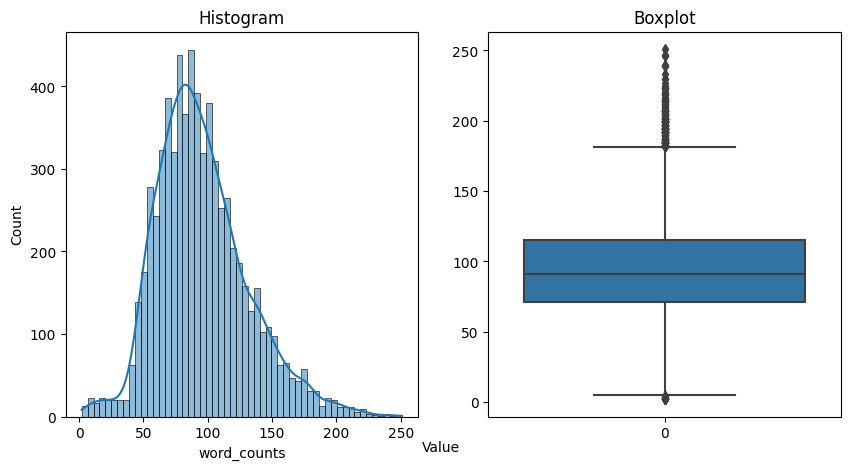

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

# Plot the histogram using seaborn on the first axis
sns.histplot(data['word_counts'], ax=ax1, kde = True)
ax1.set_title('Histogram')

# Plot the boxplot using seaborn on the second axis
sns.boxplot(data['word_counts'], ax=ax2)
ax2.set_title('Boxplot')

# Add a common x-axis label
fig.text(0.5, 0.04, 'Value', ha='center')

# Show the plot
plt.show()


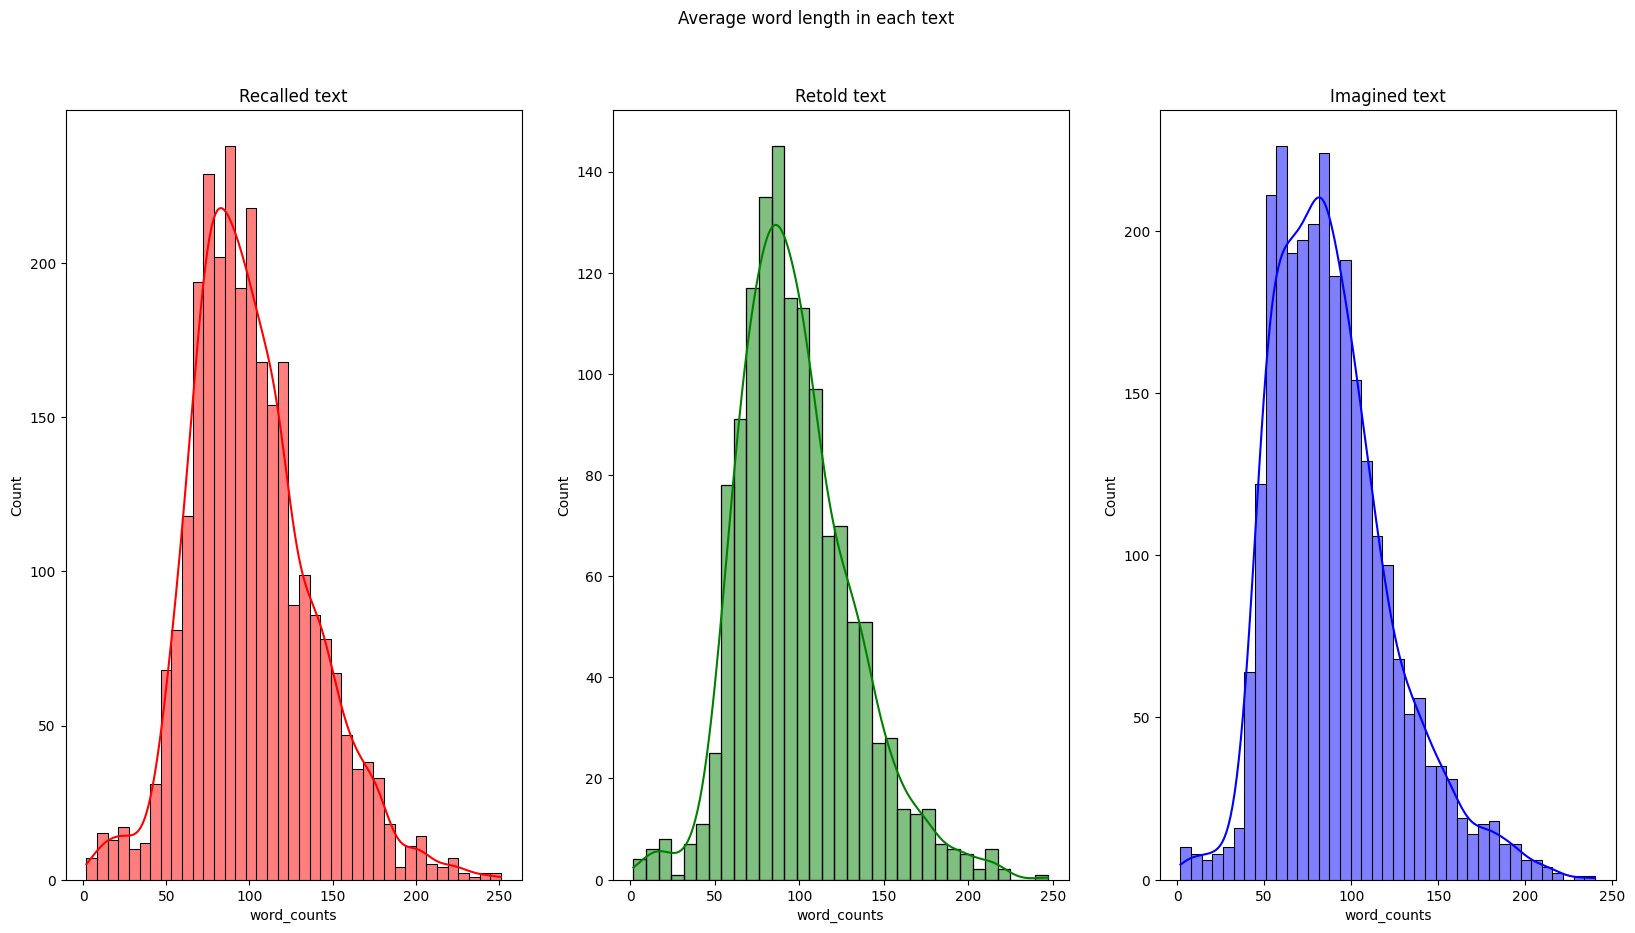

In [ ]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 10))

# Plot histogram with distribution line for recalled text
word = data[data['memType'] == 'recalled']['word_counts']
sns.histplot(word, ax=ax1, color='red', kde=True)
ax1.set_title('Recalled text')

# Plot histogram with distribution line for retold text
word = data[data['memType'] == 'retold']['word_counts']
sns.histplot(word, ax=ax2, color='green', kde=True)
ax2.set_title('Retold text')

# Plot histogram with distribution line for imagined text
word = data[data['memType'] == 'imagined']['word_counts']
sns.histplot(word, ax=ax3, color='blue', kde=True)
ax3.set_title('Imagined text')

fig.suptitle('Average word length in each text')

# Display the plot
plt.show()


# Text transformation into vectors

Check for the loss function and the class balance option

In [ ]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X = data['story_preprocessed']
y = pd.get_dummies(data['memType'], columns=['memType'])
y = np.array(y)

# Split the data into training, validation, and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Create the pipeline
pipeline = Pipeline([
    ('bow', CountVectorizer(min_df=0.05)),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', LogisticRegression(multi_class='ovr')),  # train on TF-IDF vectors with Logistic Regression
])

# Fit the pipeline on the training data
pipeline.fit(X_train, np.argmax(y_train, axis=1))  # Convert back to 1D array

# Make predictions on the test data
y_pred = pipeline.predict(X_test)

# Calculate accuracy score
accuracy = accuracy_score(np.argmax(y_test, axis=1), y_pred)  # Convert back to 1D array

# Print the accuracy score
print("Accuracy:", accuracy)

Accuracy: 0.5434623813002192


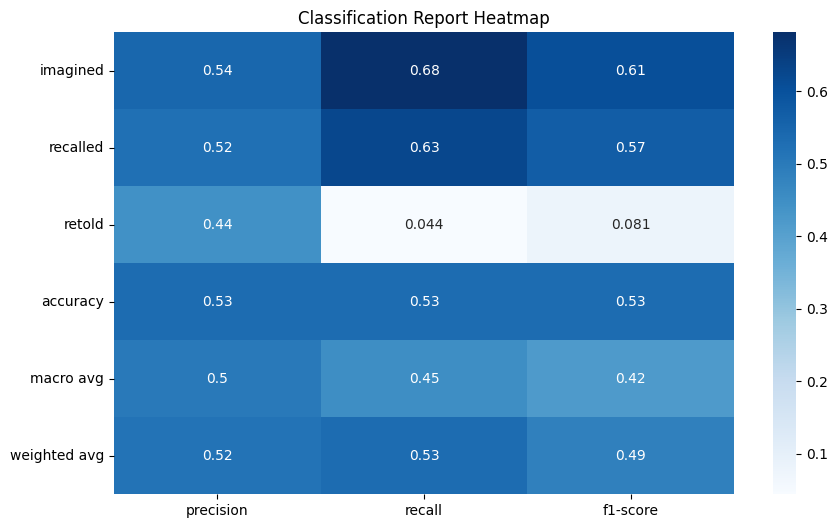

In [ ]:
from sklearn.metrics import classification_report

# Convert one-hot encoded y_test and y_pred back to 1-dimensional arrays
y_test_labels = np.argmax(y_test, axis=1)
y_pred_labels = y_pred

# Get the unique target names for classification report
target_names = data['memType'].unique()

# Calculate classification report
clf_report = classification_report(y_test_labels, y_pred_labels, target_names=target_names, output_dict=True)

# Convert the classification report to a DataFrame
clf_report_df = pd.DataFrame(clf_report)

# Plot the heatmap of the classification report
fig, ax = plt.subplots(figsize=(10, 6))
sns.heatmap(clf_report_df.iloc[:-1, :].T, annot=True, cmap='Blues', ax=ax)
ax.set_title('Classification Report Heatmap')
plt.show()


In [ ]:
bow = pipeline.named_steps['bow'].transform(X_train).toarray()
bow

array([[0, 0, 0, ..., 0, 2, 0],
       [0, 0, 1, ..., 0, 2, 0],
       [0, 1, 0, ..., 0, 1, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
tfidf = pipeline.named_steps['tfidf'].transform(bow).toarray()
tfidf

array([[0.        , 0.        , 0.        , ..., 0.        , 0.18841636,
        0.        ],
       [0.        , 0.        , 0.13343333, ..., 0.        , 0.15799224,
        0.        ],
       [0.        , 0.15368683, 0.        , ..., 0.        , 0.12087404,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.06432346, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [ ]:
column_names = pipeline.named_steps['bow'].get_feature_names_out()
bow_df = pd.DataFrame(bow, columns = column_names)
bow_df.head()
print(bow_df.shape)

(4379, 280)


In [ ]:
tfidf_df = pd.DataFrame(tfidf, columns = column_names)
tfidf_df.head()
print(tfidf_df.shape)

(4379, 280)


# Word Embedding


In [ ]:
# Print the available pretrained word embedding models:
import gensim.downloader

print(list(gensim.downloader.info()['models'].keys()))

['fasttext-wiki-news-subwords-300', 'conceptnet-numberbatch-17-06-300', 'word2vec-ruscorpora-300', 'word2vec-google-news-300', 'glove-wiki-gigaword-50', 'glove-wiki-gigaword-100', 'glove-wiki-gigaword-200', 'glove-wiki-gigaword-300', 'glove-twitter-25', 'glove-twitter-50', 'glove-twitter-100', 'glove-twitter-200', '__testing_word2vec-matrix-synopsis']


In [ ]:
# Load pre-trained word embedding models
model_glove = gensim.downloader.load('glove-wiki-gigaword-300')
# model_fasttext = gensim.downloader.load('fasttext-wiki-news-subwords-300')
# model_word2vec = gensim.downloader.load('word2vec-google-news-300')

[=================================================-] 99.7% 375.0/376.1MB downloaded


In [ ]:
model_glove.vector_size

300

In [ ]:
model_glove

In [ ]:
# Define a function to generate sentence embeddings with glove, fasttext and word2vec

def generate_sentence_embeddings(input_sentences):

  input_sentences_tokenized = input_sentences.apply(lambda x: x.split()) # tokenize
  input_sentences_tokenized = np.array(input_sentences_tokenized.apply(lambda x: np.array(list(set(x))))) # create a dictionary using set

  glove_embedding = []
  fasttext_embedding = []
  word2vec_embedding = []

  for sentence in input_sentences_tokenized:

    # glove word embedding
    glove_vec = [model_glove[word] for word in sentence if word in model_glove]
    glove_sentence_vec = np.mean(glove_vec, axis=0)
    glove_embedding.append(glove_sentence_vec)

    #fasttext word embedding
    # fasttext_vec = [model_fasttext[word] for word in sentence if word in model_fasttext]
    # fasttext_sentence_vec = np.mean(fasttext_vec, axis=0)
    # fasttext_embedding.append(fasttext_sentence_vec)

    #word2vec word embedding
    # word2vec_vec = [model_word2vec[word] for word in sentence if word in model_word2vec]
    # word2vec_sentence_vec = np.mean(word2vec_vec, axis=0)
    # word2vec_embedding.append(word2vec_sentence_vec)

  return glove_embedding, fasttext_embedding, word2vec_embedding

  #print("Number of stories converted to Glove embedding",len(glove_embedding))
  #print("Number of the Glove vector", len(glove_embedding[0]))
  #print()
  #print("Number of stories converted to Fasttext embedding",len(fasttext_embedding))
  #print("Number of the Fasttext vector", len(fasttext_embedding[0]))
  #print()
  #print("Number of stories converted to Word2Vec embedding",len(word2vec_embedding))
  #print("Number of the Word2Vec vector", len(word2vec_embedding[0]))

In [ ]:
# Compute word embedding using pre-trained Glove, Fasttext, Word2vec
glove_embedding_train, fasttext_embedding_train, word2vec_embedding_train = generate_sentence_embeddings(X_train)
glove_embedding_val, fasttext_embedding_val, word2vec_embedding_val = generate_sentence_embeddings(X_val)
glove_embedding_test, fasttext_embedding_test, word2vec_embedding_test = generate_sentence_embeddings(X_test)

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3474: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


# Representational Similarity Analysis

In [ ]:
def preprocess_data_for_rsa(array, y_train):

    y_df = pd.DataFrame(y_train)
    y_train_reset = y_df.reset_index(drop=True)

    df = pd.DataFrame(array)

    df_reset = df.reset_index(drop=True)
    df_reset['memType'] = y_train_reset
    df_reset = df_reset.sort_values(by='memType').iloc[:,:-1]
    df_reset = df.reset_index(drop=True)

    return df_reset

In [ ]:
bow_df_reset = preprocess_data_for_rsa(bow, y_train)
tfidf_df_reset = preprocess_data_for_rsa(tfidf, y_train)
glove_embedding_reset = preprocess_data_for_rsa(glove_embedding_train, y_train)
fasttext_embedding_reset = preprocess_data_for_rsa(fasttext_embedding_train, y_train)
word2vec_embedding_reset = preprocess_data_for_rsa(word2vec_embedding_train, y_train)

TypeError: ignored

In [ ]:
from scipy.spatial.distance import pdist, squareform

def compute_similarity_matrices(dfs, titles):
    RSAs = []
    for df in dfs:
        RSA = 1 - squareform(pdist(df, metric='cosine'))
        RSAs.append(RSA)

    fig, axs = plt.subplots(1, len(dfs), figsize=(10, 5))

    for RSA, ax, title in zip(RSAs, axs, titles):
        sns.heatmap(RSA, ax=ax, cmap='viridis')
        ax.set_title(title)

    plt.tight_layout()
    plt.show()


In [ ]:
freq_dfs = [bow_df_reset, tfidf_df_reset]
freq_titles = ['Bag of Words RSA', 'Tf-idf RSA']

compute_similarity_matrices(freq_dfs, freq_titles)

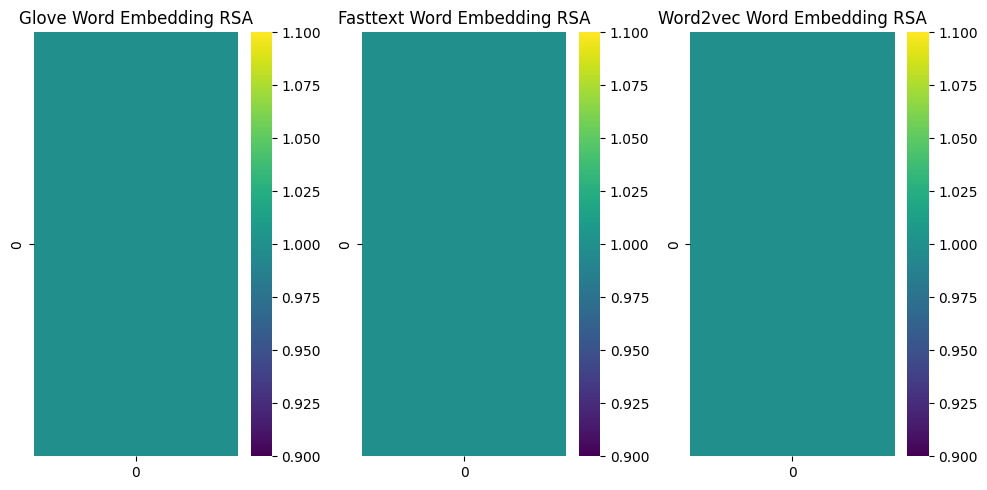

In [ ]:
embedding_dfs = [glove_embedding_reset, fasttext_embedding_reset, word2vec_embedding_reset]
embedding_titles = ['Glove Word Embedding RSA', 'Fasttext Word Embedding RSA', 'Word2vec Word Embedding RSA']

compute_similarity_matrices(embedding_dfs, embedding_titles)

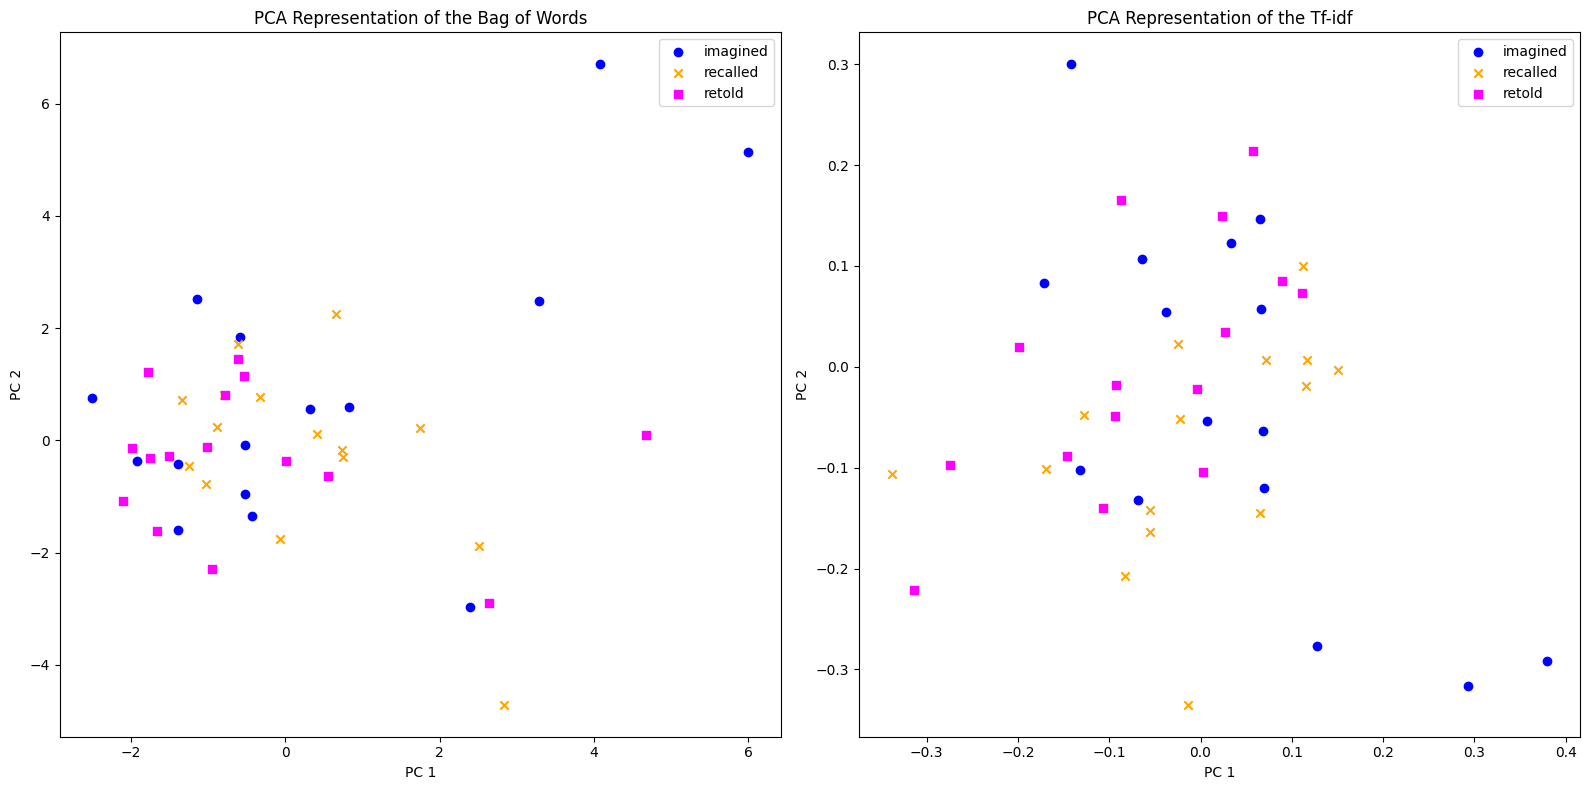

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Assume 'bow_df_reset' and 'tfidf_df_reset' are your dataframes
pca = PCA(n_components=2)

# Perform PCA on the two datasets
bow_pca = pca.fit_transform(bow_df_reset.iloc[:, :-1])
tfidf_pca = pca.fit_transform(tfidf_df_reset.iloc[:, :-1])

# Define parameters for the plot
num = 15
categs = 3
colors = ['blue', 'orange', 'magenta']
labels = ['imagined', 'recalled', 'retold']
markers = ['o', 'x', 's']

# Create a figure with two subplots
fig, axs = plt.subplots(1, 2, figsize=(16, 8))

# Plot PCA for bow_df
for i in range(categs):
   axs[0].scatter(bow_pca[i*num:(i+1)*num, 0],
               bow_pca[i*num:(i+1)*num, 1],
               c=colors[i],
               marker=markers[i], label=labels[i])
axs[0].legend()
axs[0].set_title('PCA Representation of the Bag of Words')
axs[0].set_xlabel('PC 1')
axs[0].set_ylabel('PC 2')

# Plot PCA for tfidf_df
for i in range(categs):
   axs[1].scatter(tfidf_pca[i*num:(i+1)*num, 0],
               tfidf_pca[i*num:(i+1)*num, 1],
               c=colors[i],
               marker=markers[i], label=labels[i])
axs[1].legend()
axs[1].set_title('PCA Representation of the Tf-idf')
axs[1].set_xlabel('PC 1')
axs[1].set_ylabel('PC 2')

plt.tight_layout()
plt.show()


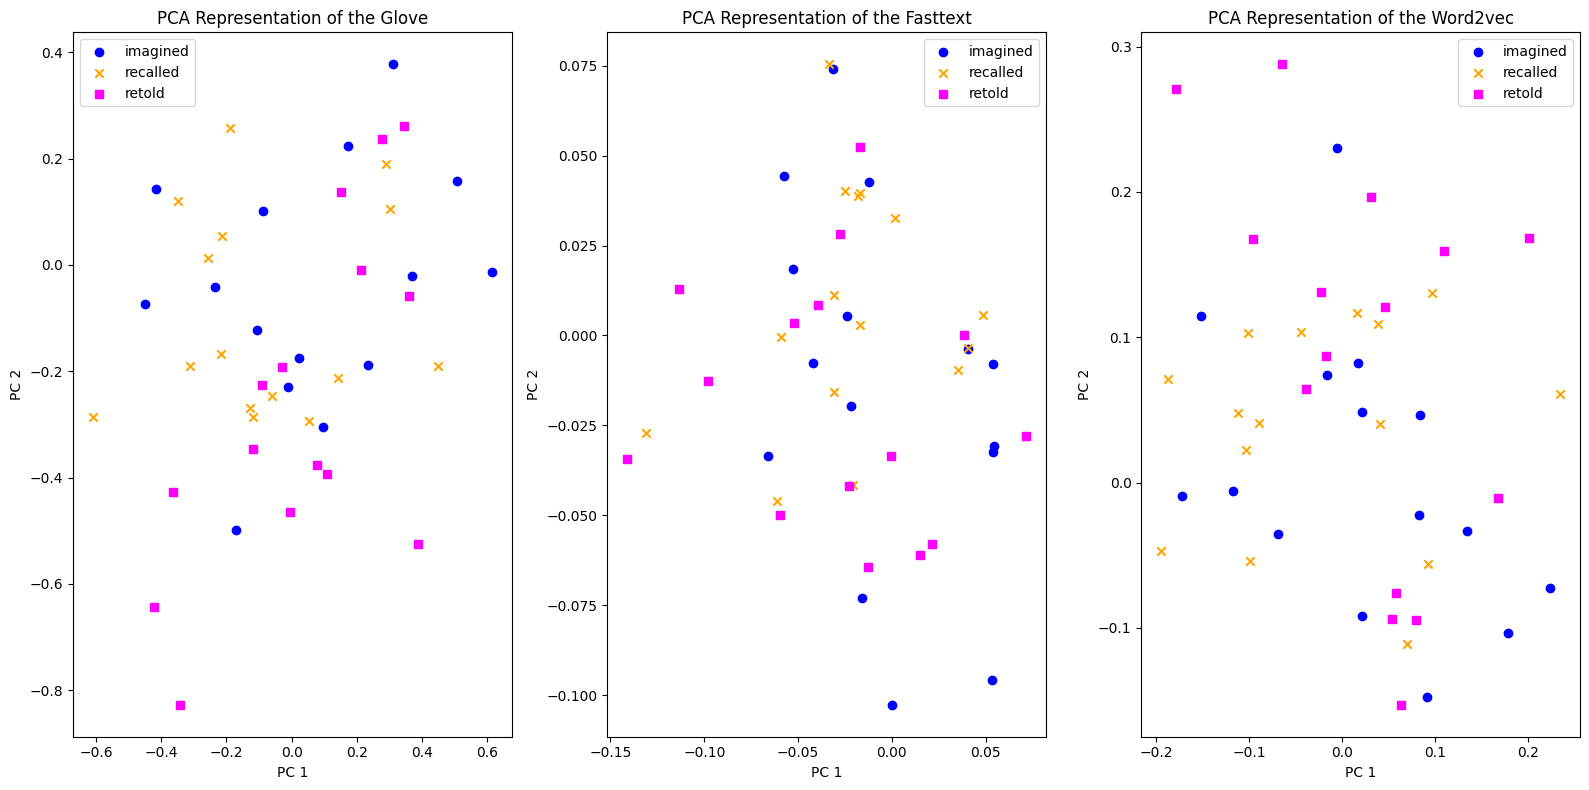

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Assume 'bow_df_reset' and 'tfidf_df_reset' are your dataframes
pca = PCA(n_components=2)

# Perform PCA on the two datasets
glove_pca = pca.fit_transform(glove_embedding_reset)
fasttext_pca = pca.fit_transform(fasttext_embedding_reset)
word2vec_pca = pca.fit_transform(word2vec_embedding_reset)

# Define parameters for the plot
num = 15
categs = 3
colors = ['blue', 'orange', 'magenta']
labels = ['imagined', 'recalled', 'retold']
markers = ['o', 'x', 's']

# Create a figure with two subplots
fig, axs = plt.subplots(1,3, figsize=(16, 8))

# Plot PCA for Glove
for i in range(categs):
   axs[0].scatter(glove_pca[i*num:(i+1)*num, 0],
               glove_pca[i*num:(i+1)*num, 1],
               c=colors[i],
               marker=markers[i], label=labels[i])
axs[0].legend()
axs[0].set_title('PCA Representation of the Glove')
axs[0].set_xlabel('PC 1')
axs[0].set_ylabel('PC 2')

# Plot PCA for Fasttext
for i in range(categs):
   axs[1].scatter(fasttext_pca[i*num:(i+1)*num, 0],
               fasttext_pca[i*num:(i+1)*num, 1],
               c=colors[i],
               marker=markers[i], label=labels[i])
axs[1].legend()
axs[1].set_title('PCA Representation of the Fasttext')
axs[1].set_xlabel('PC 1')
axs[1].set_ylabel('PC 2')


# Plot PCA for Word2vec
for i in range(categs):
   axs[2].scatter(word2vec_pca[i*num:(i+1)*num, 0],
               word2vec_pca[i*num:(i+1)*num, 1],
               c=colors[i],
               marker=markers[i], label=labels[i])
axs[2].legend()
axs[2].set_title('PCA Representation of the Word2vec')
axs[2].set_xlabel('PC 1')
axs[2].set_ylabel('PC 2')

plt.tight_layout()
plt.show()

## Other methods to compute RSA

In [ ]:
# Preprocess the data to compute Representational Similarity Analysis

# Reset y_train indices
y_train_reset = y_train.reset_index(drop=True)

# Reset bow_df and tfidf_df indices
bow_df_reset = bow_df.reset_index(drop=True)
tfidf_df_reset = tfidf_df.reset_index(drop=True)

# Concatenate bow_df_reset and tfidf_df_reset with y_train_reset
bow_df_reset = pd.concat([bow_df_reset, y_train_reset], axis=1)
tfidf_df_reset = pd.concat([tfidf_df_reset,y_train_reset], axis = 1)

# Sort values based on memType column
bow_df_reset = bow_df_reset.sort_values(by='memType').iloc[:,:-1]
tfidf_df_reset = tfidf_df_reset.sort_values(by='memType').iloc[:,:-1]

In [ ]:
glove_embedding_reset = glove_embedding_train.reset_index(drop=True)
glove_embedding_reset = pd.concat([glove_embedding_reset, y_train_reset], axis=1)
glove_embedding_reset = glove_embedding_reset.sort_values(by='memType').iloc[:,:-1]

fasttext_embedding_reset = fasttext_embedding_train.reset_index(drop=True)
fasttext_embedding_reset = pd.concat([fasttext_embedding_reset, y_train_reset], axis=1)
fasttext_embedding_reset = fasttext_embedding_reset.sort_values(by='memType').iloc[:,:-1]

word2vec_embedding_reset = word2vec_embedding_train.reset_index(drop=True)
word2vec_embedding_reset = pd.concat([word2vec_embedding_reset, y_train_reset], axis=1)
word2vec_embedding_reset = word2vec_embedding_reset.sort_values(by='memType').iloc[:,:-1]

**Method 1:** using pdist function

In [ ]:
from scipy.spatial.distance import pdist, squareform

# Compute similarity matrices
bow_RSA = 1 - squareform(pdist(bow_df_reset.iloc[0:100,0:100], metric='cosine'))
tfidf_RSA = 1 - squareform(pdist(tfidf_df_reset.iloc[0:100,0:100], metric='cosine'))

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

# Plot heatmaps
sns.heatmap(bow_RSA, ax=ax1, cmap='viridis')
ax1.set_title('Bag of Words RSA')

sns.heatmap(tfidf_RSA, ax=ax2, cmap='viridis')
ax2.set_title('Tf-idf RSA')

plt.tight_layout()
plt.show()

**Method 2:** using the dot product after normalization

Note:

If your data is already normalized (i.e., each row of data1 has a Euclidean norm of 1), then data1 @ data1.T will indeed give you a matrix of cosine similarities. However, if your data is not normalized, you'll need to normalize it first. Here's how you can do it:

Normalize the data
data1_normalized = data1 / np.linalg.norm(data1, axis=1, keepdims=True)

Compute the matrix of cosine similarities
RSA = data1_normalized @ data1_normalized.T

In [ ]:
bow_df_norm = bow_df_reset.iloc[0:100,0:100] / np.linalg.norm(bow_df_reset.iloc[0:100,0:100], axis=1, keepdims=True)
bow_RSA = bow_df_norm.iloc[0:100,0:100] @ bow_df_norm.iloc[0:100,0:100].T

tfidf_df_norm = tfidf_df_reset.iloc[0:100,0:100] / np.linalg.norm(tfidf_df_reset.iloc[0:100,0:100], axis=1, keepdims=True)
tfidf_RSA = tfidf_df_norm.iloc[0:100,0:100] @ tfidf_df_norm.iloc[0:100,0:100].T

# Plot the respective RSA
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

# Plot heatmaps
sns.heatmap(bow_RSA, ax=ax1, cmap='viridis')
ax1.set_title('Bag of Words RSA')

sns.heatmap(tfidf_RSA, ax=ax2, cmap='viridis')
ax2.set_title('Tf-idf RSA')

plt.tight_layout()
plt.show()

# Classification task using DL

In [ ]:
import torch
from torch import nn
from torch.nn import functional as F
from torch.utils.data import Dataset
from torchvision.transforms import ToTensor
from torch.utils.data import DataLoader

In [ ]:
def set_seed(seed=None, seed_torch=True):
  """
  Function that controls randomness. NumPy and random modules must be imported.

  Args:
    seed : Integer
      A non-negative integer that defines the random state. Default is `None`.
    seed_torch : Boolean
      If `True` sets the random seed for pytorch tensors, so pytorch module
      must be imported. Default is `True`.

  Returns:
    Nothing.
  """
  if seed is None:
    seed = np.random.choice(2 ** 32)
  random.seed(seed)
  np.random.seed(seed)
  if seed_torch:
    torch.manual_seed(seed)
    torch.cuda.manual_seed_all(seed)
    torch.cuda.manual_seed(seed)
    torch.backends.cudnn.benchmark = False
    torch.backends.cudnn.deterministic = True

  print(f'Random seed {seed} has been set.')


# In case that `DataLoader` is used
def seed_worker(worker_id):
  """
  DataLoader will reseed workers following randomness in
  multi-process data loading algorithm.

  Args:
    worker_id: integer
      ID of subprocess to seed. 0 means that
      the data will be loaded in the main process
      Refer: https://pytorch.org/docs/stable/data.html#data-loading-randomness for more details

  Returns:
    Nothing
  """
  worker_seed = torch.initial_seed() % 2**32
  np.random.seed(worker_seed)
  random.seed(worker_seed)

In [ ]:
def set_device():
  """
  Set the device. CUDA if available, CPU otherwise

  Args:
    None

  Returns:
    Nothing
  """
  device = "cuda" if torch.cuda.is_available() else "cpu"
  if device != "cuda":
    print("WARNING: For this notebook to perform best, "
        "if possible, in the menu under `Runtime` -> "
        "`Change runtime type.`  select `GPU` ")
  else:
    print("GPU is enabled in this notebook.")

  return device

In [ ]:
SEED = 2021
set_seed(seed=SEED)
device = set_device()

Random seed 2021 has been set.


In [ ]:
class CiceroNet(nn.Module):
  """
  A Linear Neural Net with one word embedding layer +  hidden layer
  """
  def __init__(self, embed_dim, hidden_dim, output_dim):

      """
      Initialize Ciceronet parameters

      Args:
      emebed_dim: int
      Embedding dimension
      out_dim: int
      Ouput dimension
      hid_dim: int
      Hidden dimension

      Returns: nothing

      """
      super(CiceroNet, self).__init__()
      self.fc1 = nn.Linear(embed_dim, hidden_dim)
      self.fc2 = nn.Linear(hidden_dim, output_dim)


  def forward(self, x):
      """
      Forward pass of Ciceronet

      Args:
      x: torch.Tensor
      Input tensor

      Returns:
      hid: torch.Tensor
      Hidden layer activity
      out: torch.Tensor
      Output/Prediction
      """
      x = F.relu(self.fc1(x))
      x = self.fc2(x)
      return F.softmax(x, dim=1)


In [ ]:
class MemoriesData(Dataset):

  def __init__(self, data_list, targets):
    self.data = data_list
    self.targets = targets

  def __len__(self):
    return len(self.data)

  def __getitem__(self, idx):
    data = torch.tensor(self.data[idx], dtype=torch.float32)
    target = torch.tensor(self.targets[idx], dtype=torch.float32)
    return data, target


In this function:

**model** is the PyTorch model to train.

**train_loader** and **val_loader** are PyTorch DataLoader objects for the training and validation data, respectively.

**epochs** is the number of training epochs.

**optimizer** is a PyTorch optimizer object (like torch.optim.SGD or torch.optim.Adam).

**criterion** is a PyTorch loss function object (like nn.CrossEntropyLoss).

**device** is a torch.device object representing the device on which the computations will be performed. This can be either a CPU or a GPU, depending on your setup and the availability of these resources.

This function trains the model in the training phase, and then validates the model in the validation phase. The model's parameters are updated in the training phase, and then the model's performance is evaluated on the validation data. During the validation phase, the model is set to evaluation mode (**.eval()**), and no gradients are computed (with **torch.no_grad()**). This is to save memory and compute resources during the validation phase.

In [ ]:
def train_model(model, train_loader, val_loader, epochs, optimizer, criterion, device):

    train_losses = []
    val_losses = []

    # Move model to the appropriate device
    model.to(device)

    for epoch in range(epochs):
        model.train()  # Set the model to training mode
        train_loss = 0.0
        for inputs, labels in train_loader:
            inputs, labels = inputs.to(device), labels.to(device)

            optimizer.zero_grad()  # clear gradients
            outputs = model(inputs)  # forward pass
            loss = criterion(outputs, labels)  # compute loss
            loss.backward()  # backpropagation
            optimizer.step()  # update weights

            train_loss += loss.item() * inputs.size(0)

        # calculate average losses
        train_loss = train_loss / len(train_loader.dataset)
        train_losses.append(train_loss)

        # print training/validation statistics
        if (epoch + 1) % 50 == 0:  # print every 50 epochs
            print('Epoch: {} \tTraining Loss: {:.6f}'.format(epoch + 1, train_loss))

        # validate the model
        model.eval()  # Set the model to evaluation mode
        val_loss = 0.0
        correct = 0.0
        total = 0.0
        with torch.no_grad():
          for inputs, labels in val_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            val_loss += loss.item() * inputs.size(0)

            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)

            # Convert one-hot encoded labels to class labels
            labels = torch.argmax(labels, dim=1)
            correct += (predicted == labels).sum().item()

        val_loss = val_loss / len(val_loader.dataset)
        val_losses.append(val_loss)

        val_acc = correct / total

        # print training/validation statistics
        if (epoch + 1) % 50 == 0:  # print every 50 epochs
          print('Validation Loss: {:.6f} \tValidation Accuracy: {:.6f}'.format(val_loss, val_acc))

        model.train()  # Set the model back to training mode after validation

    return train_losses, val_losses


In this function:

**model** is the PyTorch model to test.

**test_loader** is a PyTorch DataLoader object for the test data.

**device** is a torch.device object representing the device on which the computations will be performed. This can be either a CPU or a GPU, depending on your setup and the availability of these resources.

This function sets the model to evaluation mode (**.eval()**) and then runs the model on the test data without computing gradients (with **torch.no_grad()**). The accuracy of the model on the test data is then computed and printed.

In [ ]:
def test_model(model, test_loader, device):
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            labels = torch.argmax(labels, dim=1)
            correct += (predicted == labels).sum().item()
    print('Test Accuracy: {:.2f}%'.format(100 * correct / total))


In [ ]:
# Define model parameters
embed_dim = 300     # dimension of word embedding vector
hidden_dim = 500    # number of nodes in the hidden layer
output_dim = 3      # number of classes

# Instantiate the model
model = CiceroNet(embed_dim, hidden_dim, output_dim)

# Move the model to the device
model = model.to(device)

# Set the optimizer and the loss function (criterion)
optimizer = torch.optim.Adam(model.parameters())
criterion = nn.CrossEntropyLoss()

# Set the number of epochs
epochs = 500

## Glove embedding

In [ ]:
# Instanciate the MemoriesData function on our train, val, and test sets
train_data = MemoriesData(glove_embedding_train, y_train)
val_data = MemoriesData(glove_embedding_val, y_val)
test_data = MemoriesData(glove_embedding_test, y_test)

In [ ]:
## DO WE NEED THIS? ##
#g_seed = torch.Generator()
#g_seed.manual_seed(SEED)

# Instanciate the dataloader to load your data in batches
train_dataloader = DataLoader(train_data, batch_size=64, shuffle=True, worker_init_fn=seed_worker) # generator = g_seed IS IT USEFUL FOR US?
test_dataloader = DataLoader(test_data, batch_size=64, shuffle=True, worker_init_fn=seed_worker) # generator = g_seed IS IT USEFUL FOR US?

In [ ]:
train_losses, val_losses = train_model(model, train_dataloader, test_dataloader, epochs, optimizer, criterion, device)

RuntimeError: ignored

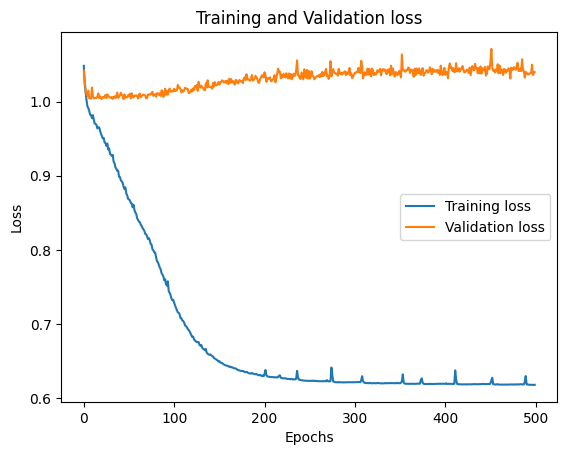

In [ ]:
# Plot your training and validation loss in each epoch.

plt.figure()
plt.plot(train_losses, label='Training loss')
plt.plot(val_losses, label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
test_model(model,test_dataloader,device)

Test Accuracy: 49.38%


In [ ]:
from torchsummary import summary

# Print the summary of your model
summary(model, input_size=(embed_dim,))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                  [-1, 500]         150,500
            Linear-2                    [-1, 3]           1,503
Total params: 152,003
Trainable params: 152,003
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.58
Estimated Total Size (MB): 0.58
----------------------------------------------------------------


## Fasttext embedding

In [ ]:
# Instanciate the MemoriesData function on our train, val, and test sets
train_data = MemoriesData(fasttext_embedding_train, y_train)
val_data = MemoriesData(fasttext_embedding_val, y_val)
test_data = MemoriesData(fasttext_embedding_test, y_test)

In [ ]:
## DO WE NEED THIS? ##
#g_seed = torch.Generator()
#g_seed.manual_seed(SEED)

# Instanciate the dataloader to load your data in batches
train_dataloader = DataLoader(train_data, batch_size=64, shuffle=True, worker_init_fn=seed_worker) # generator = g_seed IS IT USEFUL FOR US?
test_dataloader = DataLoader(test_data, batch_size=64, shuffle=True, worker_init_fn=seed_worker) # generator = g_seed IS IT USEFUL FOR US?

In [ ]:
train_losses, val_losses = train_model(model, train_dataloader, test_dataloader, epochs, optimizer, criterion, device)

Epoch: 50 	Training Loss: 0.960715
Validation Loss: 0.991652 	Validation Accuracy: 0.536888
Epoch: 100 	Training Loss: 0.947874
Validation Loss: 0.988026 	Validation Accuracy: 0.547845
Epoch: 150 	Training Loss: 0.936092
Validation Loss: 0.991224 	Validation Accuracy: 0.544923
Epoch: 200 	Training Loss: 0.924458
Validation Loss: 0.990957 	Validation Accuracy: 0.544193
Epoch: 250 	Training Loss: 0.910218
Validation Loss: 0.992589 	Validation Accuracy: 0.545654
Epoch: 300 	Training Loss: 0.897987
Validation Loss: 0.993577 	Validation Accuracy: 0.540541
Epoch: 350 	Training Loss: 0.883803
Validation Loss: 0.996815 	Validation Accuracy: 0.536888
Epoch: 400 	Training Loss: 0.858967
Validation Loss: 0.995946 	Validation Accuracy: 0.537619
Epoch: 450 	Training Loss: 0.829348
Validation Loss: 0.997426 	Validation Accuracy: 0.535427
Epoch: 500 	Training Loss: 0.798037
Validation Loss: 1.001893 	Validation Accuracy: 0.528853


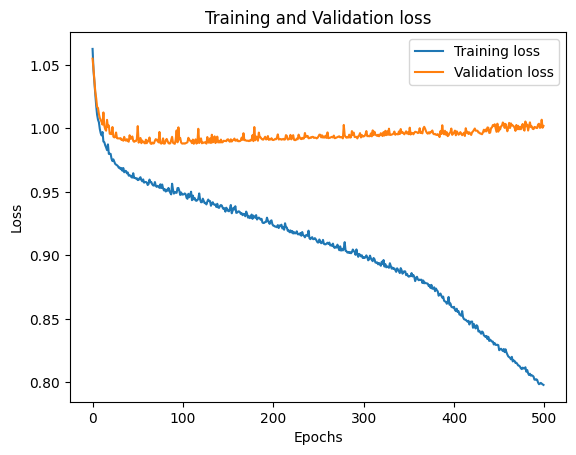

In [ ]:
# Plot your training and validation loss in each epoch.

plt.figure()
plt.plot(train_losses, label='Training loss')
plt.plot(val_losses, label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
test_model(model,test_dataloader,device)

Test Accuracy: 52.89%


## Word2vec embedding

In [ ]:
# Instanciate the MemoriesData function on our train, val, and test sets
train_data = MemoriesData(word2vec_embedding_train, y_train)
val_data = MemoriesData(word2vec_embedding_val, y_val)
test_data = MemoriesData(word2vec_embedding_test, y_test)

In [ ]:
## DO WE NEED THIS? ##
#g_seed = torch.Generator()
#g_seed.manual_seed(SEED)

# Instanciate the dataloader to load your data in batches
train_dataloader = DataLoader(train_data, batch_size=64, shuffle=True, worker_init_fn=seed_worker) # generator = g_seed IS IT USEFUL FOR US?
test_dataloader = DataLoader(test_data, batch_size=64, shuffle=True, worker_init_fn=seed_worker) # generator = g_seed IS IT USEFUL FOR US?

In [ ]:
train_losses, val_losses = train_model(model, train_dataloader, test_dataloader, epochs, optimizer, criterion, device)

Epoch: 50 	Training Loss: 1.143260
Validation Loss: 1.145451 	Validation Accuracy: 0.406136
Epoch: 100 	Training Loss: 1.143327
Validation Loss: 1.146497 	Validation Accuracy: 0.404675
Epoch: 150 	Training Loss: 1.136128
Validation Loss: 1.150801 	Validation Accuracy: 0.398101
Epoch: 200 	Training Loss: 1.121555
Validation Loss: 1.149111 	Validation Accuracy: 0.401753
Epoch: 250 	Training Loss: 1.101542
Validation Loss: 1.149909 	Validation Accuracy: 0.397370
Epoch: 300 	Training Loss: 1.082033
Validation Loss: 1.091015 	Validation Accuracy: 0.453616
Epoch: 350 	Training Loss: 0.962925
Validation Loss: 1.052821 	Validation Accuracy: 0.490139
Epoch: 400 	Training Loss: 0.920315
Validation Loss: 1.046180 	Validation Accuracy: 0.500365
Epoch: 450 	Training Loss: 0.898538
Validation Loss: 1.044909 	Validation Accuracy: 0.499635
Epoch: 500 	Training Loss: 0.863621
Validation Loss: 1.048180 	Validation Accuracy: 0.491600


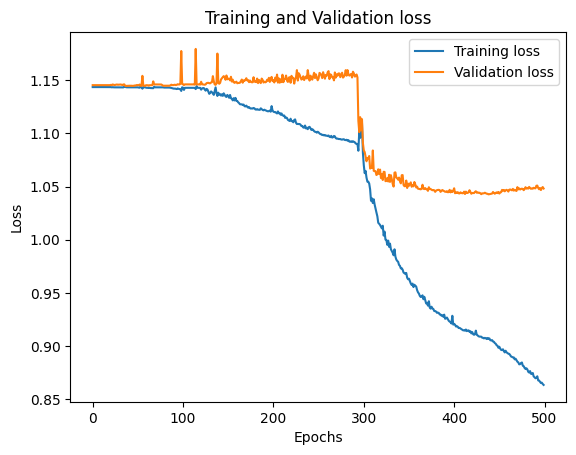

In [ ]:
# Plot your training and validation loss in each epoch.

plt.figure()
plt.plot(train_losses, label='Training loss')
plt.plot(val_losses, label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
test_model(model,test_dataloader,device)

Test Accuracy: 49.16%


# DistilBert in Huggingface

**Load Dataset**

In [ ]:
from datasets import Dataset

dataset = Dataset.from_pandas(data[['story','memType']])
dataset = dataset.rename_column('memType', 'labels')
dataset = dataset.rename_column('story', 'text')

In [ ]:
dataset

Dataset({
    features: ['text', 'labels', '__index_level_0__'],
    num_rows: 6843
})

In [ ]:
id2label = {0: "imagined", 1: "recalled", 2:"retold"}
label2id = {"imagined": 0, "recalled": 1, "retold":2}

In [ ]:
def convert_labels_to_integers(example):
    example['labels'] = label2id[example['labels']]
    return example

dataset = dataset.map(convert_labels_to_integers)

Map:   0%|          | 0/6843 [00:00<?, ? examples/s]

In [ ]:
# Assume `dataset` is your Dataset object
datasets = dataset.train_test_split(test_size=0.2)

In [ ]:
datasets

DatasetDict({
    train: Dataset({
        features: ['text', 'labels', '__index_level_0__'],
        num_rows: 5474
    })
    test: Dataset({
        features: ['text', 'labels', '__index_level_0__'],
        num_rows: 1369
    })
})

**Preprocess**

In [ ]:
#from transformers import DistilBertTokenizerFast

# Load the tokenizer
#tokenizer = DistilBertTokenizerFast.from_pretrained('distilbert-base-uncased')

# Function to tokenize the dataset
#def tokenize(batch):
#    return tokenizer(batch['text'], padding=True, truncation=True)

# Apply the function to the datasets
#datasets = datasets.map(tokenize, batched=True, batch_size=len(datasets))

In [ ]:
from transformers import AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained("distilbert-base-uncased")

In [ ]:
def preprocess_function(examples):
    return tokenizer(examples["text"], truncation=True)

In [ ]:
tokenized_dataset = datasets.map(preprocess_function, batched=True)

Map:   0%|          | 0/5474 [00:00<?, ? examples/s]

Map:   0%|          | 0/1369 [00:00<?, ? examples/s]

In [ ]:
from transformers import DataCollatorWithPadding

data_collator = DataCollatorWithPadding(tokenizer=tokenizer)

**Evaluate**

In [ ]:
import evaluate

accuracy = evaluate.load("accuracy")

In [ ]:
import numpy as np


def compute_metrics(eval_pred):
    predictions, labels = eval_pred
    predictions = np.argmax(predictions, axis=1)
    return accuracy.compute(predictions=predictions, references=labels)

**Train**

In [ ]:
from transformers import AutoModelForSequenceClassification, TrainingArguments, Trainer

model = AutoModelForSequenceClassification.from_pretrained(
    "distilbert-base-uncased", num_labels=3, id2label=id2label, label2id=label2id
)

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'pre_classifier.bias', 'classifier.weight', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
training_args = TrainingArguments(
    output_dir="my_awesome_model",
    learning_rate=2e-5,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    num_train_epochs=2,
    weight_decay=0.01,
    evaluation_strategy="epoch",
    save_strategy="epoch",
    load_best_model_at_end=True,
    push_to_hub=False,
)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_dataset['train'],
    eval_dataset=tokenized_dataset['test'],
    tokenizer=tokenizer,
    data_collator=data_collator,
    compute_metrics=compute_metrics,
)

trainer.train()

/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(
You're using a DistilBertTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


Epoch,Training Loss,Validation Loss


In [ ]:
trainer.evaluate()

{'eval_loss': 0.7447909712791443,
 'eval_accuracy': 0.6661796932067202,
 'eval_runtime': 20.7882,
 'eval_samples_per_second': 65.855,
 'eval_steps_per_second': 4.137,
 'epoch': 2.0}

In [ ]:
from sklearn.metrics import confusion_matrix
import numpy as np

# Generate predictions
predictions = trainer.predict(tokenized_dataset["test"])

# The predictions are in logits, so we need to take the argmax to get the predicted class index
pred_labels = np.argmax(predictions.predictions, axis=1)

# Calculate the confusion matrix
conf_matrix = confusion_matrix(predictions.label_ids, pred_labels)

# Print the confusion matrix
print(conf_matrix)

[[430  80  49]
 [107 371  73]
 [ 49  99 111]]


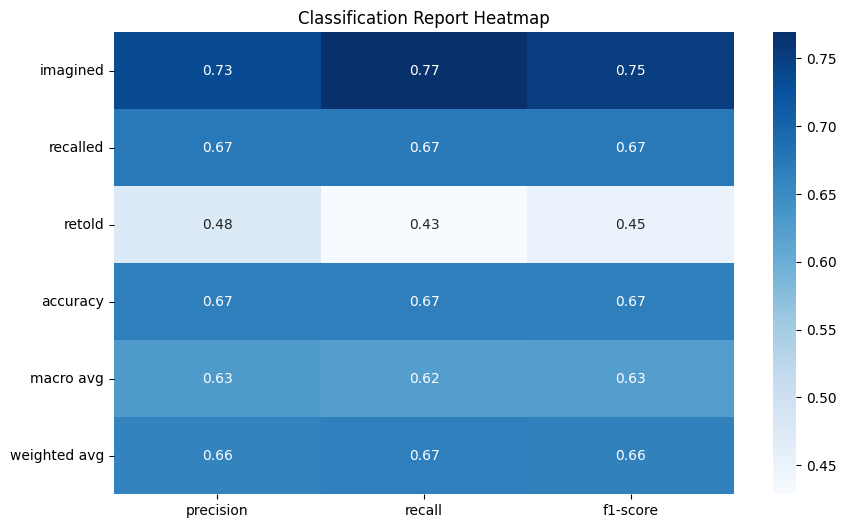

In [ ]:
from sklearn.metrics import classification_report

# Generate a classification report
clf_report = classification_report(predictions.label_ids, pred_labels, target_names=id2label.values(), output_dict=True)

# Convert the classification report to a DataFrame
clf_report_df = pd.DataFrame(clf_report)

# Plot the heatmap of the classification report
fig, ax = plt.subplots(figsize=(10, 6))
sns.heatmap(clf_report_df.iloc[:-1, :].T, annot=True, cmap='Blues', ax=ax)
ax.set_title('Classification Report Heatmap')
plt.show()

In [ ]:
# Define the index for the "imagined" label
imagined_index = 0  # Change this to the correct index if it's not 1

# Get the true and predicted labels for instances that are labeled "imagined"
true_labels_imagined = predictions.label_ids[predictions.label_ids == imagined_index]
pred_labels_imagined = pred_labels[predictions.label_ids == imagined_index]

# Compute accuracy for the "imagined" category
accuracy_imagined = np.mean(pred_labels_imagined == true_labels_imagined)

# Print the accuracy
print("Accuracy for 'imagined':", accuracy_imagined)

Accuracy for 'imagined': 0.7692307692307693


In [ ]:
# Count the number of occurrences of each value
counts = np.bincount(pred_labels_imagined)

# Calculate the frequency of each unique value
frequencies = counts / len(pred_labels_imagined)

# Print the frequencies
for label, frequency in enumerate(frequencies):
    print(f"Frequency of {id2label[label]}: {frequency}")


Frequency of imagined: 0.7692307692307693
Frequency of recalled: 0.14311270125223613
Frequency of retold: 0.08765652951699464


In [ ]:
# Define the index for the "recalled" label
recalled_index = 1  # Change this to the correct index if it's not 1

# Get the true and predicted labels for instances that are labeled "recalled"
true_labels_recalled = predictions.label_ids[predictions.label_ids == recalled_index]
pred_labels_recalled = pred_labels[predictions.label_ids == recalled_index]

# Compute accuracy for the "retold" category
accuracy_recalled = np.mean(pred_labels_recalled == true_labels_recalled)

# Print the accuracy
print("Accuracy for 'recalled':", accuracy_recalled)

Accuracy for 'recalled': 0.6733212341197822


In [ ]:
# Count the number of occurrences of each value
counts = np.bincount(pred_labels_recalled)

# Calculate the frequency of each unique value
frequencies = counts / len(pred_labels_recalled)

# Print the frequencies
for label, frequency in enumerate(frequencies):
    print(f"Frequency of {id2label[label]}: {frequency}")

Frequency of imagined: 0.19419237749546278
Frequency of recalled: 0.6733212341197822
Frequency of retold: 0.132486388384755


In [ ]:
# Define the index for the "retold" label
retold_index = 2  # Change this to the correct index if it's not 2

# Get the true and predicted labels for instances that are labeled "retold"
true_labels_retold = predictions.label_ids[predictions.label_ids == retold_index]
pred_labels_retold = pred_labels[predictions.label_ids == retold_index]

# Compute accuracy for the "retold" category
accuracy_retold = np.mean(pred_labels_retold == true_labels_retold)

# Print the accuracy
print("Accuracy for 'retold':", accuracy_retold)

Accuracy for 'retold': 0.42857142857142855


In [ ]:
# Count the number of occurrences of each value
counts = np.bincount(pred_labels_retold)

# Calculate the frequency of each unique value
frequencies = counts / len(pred_labels_retold)

# Print the frequencies
for label, frequency in enumerate(frequencies):
    print(f"Frequency of {id2label[label]}: {frequency}")


Frequency of imagined: 0.1891891891891892
Frequency of recalled: 0.38223938223938225
Frequency of retold: 0.42857142857142855
